In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [12]:
import warnings
warnings.filterwarnings('ignore')

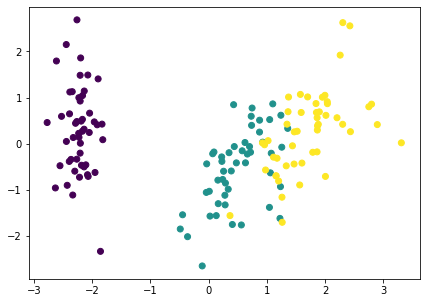

In [13]:
# 01

from sklearn.datasets import load_iris
iris = load_iris()
iris_X = iris.data
y = iris.target

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Create Pipeline '1.Standard Scaler'--> '2. PCA'
pipe = Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=2))])
iris_x_scaled = pipe.fit_transform(iris_X)

fig,ax = plt.subplots(1,1,figsize=(7,5))
ax.scatter(iris_x_scaled[:,0],iris_x_scaled[:,1],c=y)

### FeatureUnion : Concatenates results of multiple transformer objects.

In [14]:
from sklearn.datasets import load_digits

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# For reproducibility
np.random.seed(1000)

# Load the dataset
digits = load_digits()

# Create the steps for a feature union
steps_fu = [('pca', PCA(n_components=10)),('kbest', SelectKBest(f_classif, k=5)),]

# Create the steps for the pipeline
fu = FeatureUnion(steps_fu)
scaler = StandardScaler()
svc = SVC(kernel='rbf', C=5.0, gamma=0.05)

pipeline_steps = [('fu', fu),('scaler', scaler),('classifier', svc)]

pipeline = Pipeline(pipeline_steps)

print('Cross-validation score:')
print(cross_val_score(pipeline, digits.data, digits.target, cv=10).mean())

Cross-validation score:
0.9638299193047797


### 'fit_transform ' 'get Steps' 'make_pipeline'  and 'set_params' in Pipeline

In [32]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

iris_data = iris.data
mask = np.random.binomial(1,.25,iris_data.shape).astype(bool)

iris_data[mask] = np.nan

print(iris_data[:5])

from sklearn import pipeline,preprocessing,decomposition
from sklearn.impute import SimpleImputer

#************************************************************

pca = decomposition.PCA()
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

pipe = pipeline.Pipeline([('imputer',imputer),('pca',pca)])

iris_data_transfored = pipe.fit_transform(iris_data)
iris_data_transfored[:5]

print("\n")

#**************************************************************
# Create New PipeLine
pipe2 = pipeline.make_pipeline(imputer, pca)
print(pipe2.steps)

iris_data_transformed2 = pipe2.fit_transform(iris_data)
print(iris_data_transformed2[:5])

# Set Parameter
pipe2.set_params(pca__n_components=2)

#************************************************************
print("\n")

# Transofr
iris_data_transformed3 = pipe2.fit_transform(iris_data)
print(iris_data_transformed3[:5])

[[5.1 nan nan 0.2]
 [4.9 nan 1.4 nan]
 [4.7 nan 1.3 0.2]
 [4.6 nan 1.5 0.2]
 [5.  nan 1.4 0.2]]


[('simpleimputer', SimpleImputer()), ('pca', PCA())]
[[-0.49135496  0.94950545  0.44169988  0.02481858]
 [-2.36991636 -0.26508805 -0.68218967 -0.02251924]
 [-2.79267347  0.26536097 -0.01596212 -0.12953852]
 [-2.64540213  0.42508613 -0.04231416 -0.08366266]
 [-2.60537126  0.07415532  0.13976445 -0.19362844]]


[[-0.49135496  0.94950545]
 [-2.36991636 -0.26508805]
 [-2.79267347  0.26536097]
 [-2.64540213  0.42508613]
 [-2.60537126  0.07415532]]
